In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


## 0. 데이터 불러오기

In [2]:
df = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")

In [3]:
# display(df)로 한 셀에서 출력을 한꺼번에 볼 수 있음
display(df.head())
display(df.info())
display(df.describe())

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

# 1. 데이터 살펴보기 & 전처리

In [4]:
# 각 열의 데이터 타입, 결측치 개수, 고유한 값 개수, 데이터 유형 확인하기 위한 함수 정의

def summary(df):
    print('data shape', df.shape)
    s = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    s['결측치 개수'] = df.isnull().sum().values
    s['고유한 값 개수'] = df.nunique().values
    s = pd.concat([s, df.head(3).T], axis =1)
    return s

summary(df)

data shape (10886, 12)


데이터 타입  결측치 개수  고유한 값 개수                    0  \
datetime     object       0     10886  2011-01-01 00:00:00   
season        int64       0         4                    1   
holiday       int64       0         2                    0   
workingday    int64       0         2                    0   
weather       int64       0         4                    1   
temp        float64       0        49                 9.84   
atemp       float64       0        60               14.395   
humidity      int64       0        89                   81   
windspeed   float64       0        28                  0.0   
casual        int64       0       309                    3   
registered    int64       0       731                   13   
count         int64       0       822                   16   

                              1                    2  
datetime    2011-01-01 01:00:00  2011-01-01 02:00:00  
season                        1                    1  
holiday                       0                    0  
workingday                    0                    0  
weather                       1                    1  
temp                       9.02                 9.02  
atemp                    13.635               13.635  
humidity                     80                   80  
windspeed                   0.0                  0.0  
casual                        8                    5  
registered                   32                   27  
count                        40                   32

In [5]:
# 날짜 형태가 object이므로 datetime으로 변환해야 함
df.datetime = pd.to_datetime(df.datetime)

df.datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [6]:
# 연월일시요일로 분리
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df["datetime"].dt.dayofweek # Monday=0, Sunday=6.
df

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.0000       3          13     16  2011      1   
1      13.635        80     0.0000       8          32     40  2011      1   
2      13.635        80     0.0000       5          27     32  2011      1   
3      14.395        75     0.0000       3          10     13  2011      1   
4      14.395        75     0.0000       0           1      1  2011      1   
...       ...       ...        ...     ...         ...    ...   ...    ...   
10881  19.695        50    26.0027       7         329    336  2012     12   
10882  17.425        57    15.0013      10         231    241  2012     12   
10883  15.910        61    15.0013       4         164    168  2012     12   
10884  17.425        61     6.0032      12         117    129  2012     12   
10885  16.665        66     8.9981       4          84     88  2012     12   

       day  hour  dayofweek  
0        1     0          5  
1        1     1          5  
2        1     2          5  
3        1     3          5  
4        1     4          5  
...    ...   ...        ...  
10881   19    19          2  
10882   19    20          2  
10883   19    21          2  
10884   19    22          2  
10885   19    23          2  

[10886 rows x 17 columns]

In [7]:
pd.pivot_table(df, values='datetime', index=['holiday'], columns =['workingday'], aggfunc='count')

workingday       0       1
holiday                   
0           3163.0  7412.0
1            311.0     NaN

In [8]:
import pandas as pd

# kaggle에서는 머신러닝용 데이터셋을 주로 사용하므로, 모든 데이터가 숫자로 변환되어 있음
# 탐색적 데이터 분석이 목적이므로, 원래대로 다시 변환
# 데이터에 대한 설명은 데이터셋 페이지에서 확인 가능
# 범주형 데이터 변환
df['season'] = df['season'].map({1: '봄', 2: '여름', 3: '가을', 4: '겨울'})
df['holiday'] = df['holiday'].map({0: '공휴일 아님', 1: '공휴일'})
df['workingday'] = df['workingday'].map({0: '근무일 아님', 1: '근무일'})
df['weather'] = df['weather'].map({
    1: '좋음',
    2: '약간 흐림',
    3: '흐림',
    4: '매우 흐림'
})
df['dayofweek'] = df['dayofweek'].map({0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'})

df.head()

datetime season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      봄  공휴일 아님     근무일 아님      좋음  9.84  14.395   
1 2011-01-01 01:00:00      봄  공휴일 아님     근무일 아님      좋음  9.02  13.635   
2 2011-01-01 02:00:00      봄  공휴일 아님     근무일 아님      좋음  9.02  13.635   
3 2011-01-01 03:00:00      봄  공휴일 아님     근무일 아님      좋음  9.84  14.395   
4 2011-01-01 04:00:00      봄  공휴일 아님     근무일 아님      좋음  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

  dayofweek  
0         토  
1         토  
2         토  
3         토  
4         토

# 2. 기본 시각화

In [9]:
!pip install koreanize-matplotlib --quiet # 한글 출력 돕는 라이브러리

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

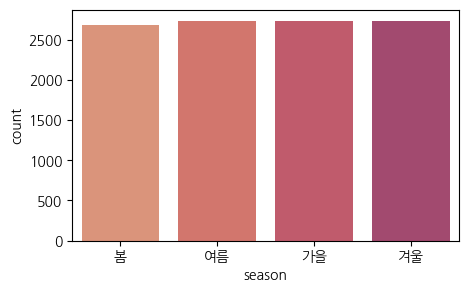

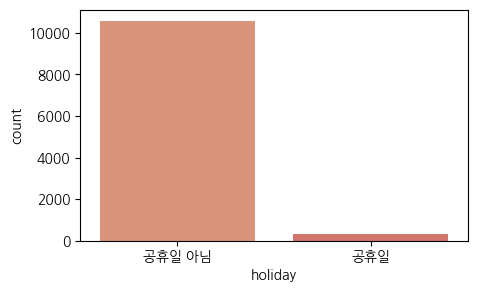

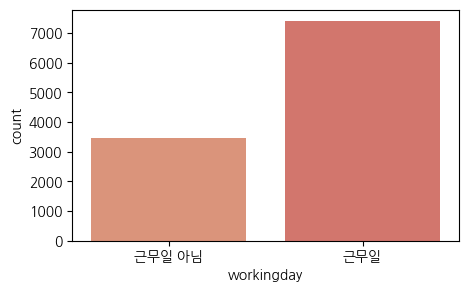

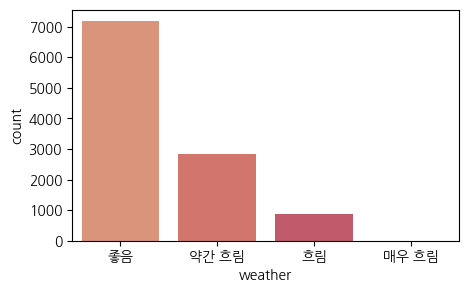

In [11]:
sns.set_palette("flare") # 팔레트 색 설정

for col in ['season','holiday','workingday','weather']:
    plt.figure(figsize = (5, 3))
    sns.countplot(df, x = col)
    plt.show() # for문 안에 들어와야 함

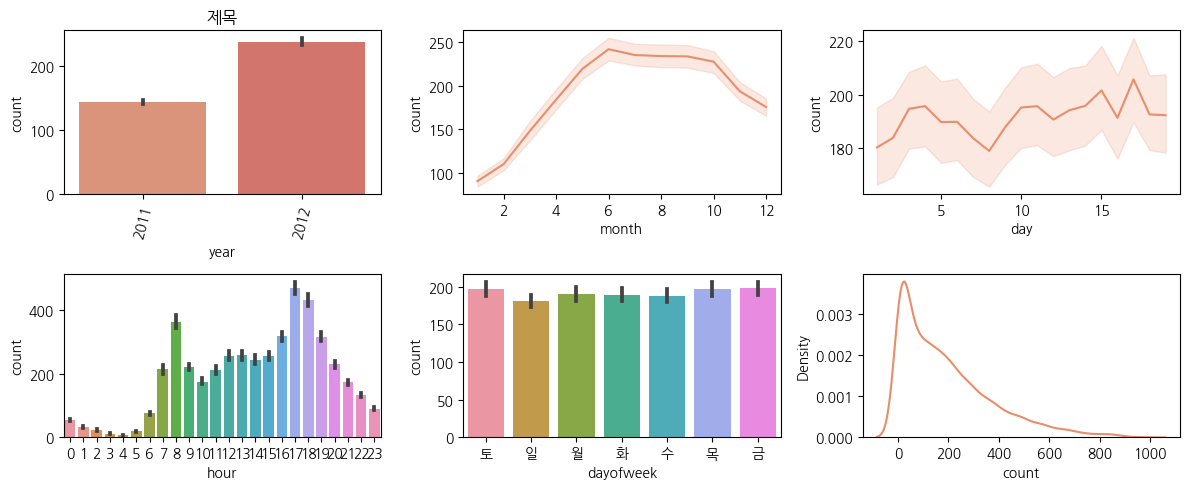

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2행 3열 형태로 서브플롯 생성
fig, axs = plt.subplots(2, 3, figsize=(12, 5))
# data = pd.DataFrame(data = np.random.randn(100, 6), columns=['A', 'B', 'C', 'D', 'E', 'F'])

# 각 서브플롯에 seaborn을 사용한 데이터 플롯
sns.barplot(data = df, x = 'year', y = 'count', ax = axs[0, 0])
sns.lineplot(data = df, x = 'month', y = 'count', ax = axs[0, 1])
sns.lineplot(data = df, x = 'day', y = 'count', ax = axs[0, 2])
sns.barplot(data = df, x = 'hour', y = 'count', ax = axs[1, 0])
sns.barplot(data = df, x = 'dayofweek', y = 'count', ax = axs[1, 1])
sns.kdeplot(data = df, x = 'count', ax = axs[1, 2])

# 제목 할당
axs[0, 0].set_title('제목')
axs[0, 1].set_title('')
axs[0, 2].set_title('')
axs[1, 0].set_title('')
axs[1, 1].set_title('')
axs[1, 2].set_title('')
axs[0, 0].tick_params(axis= "x", labelrotation = 75)

# 레이아웃 조정
plt.tight_layout()
plt.show()

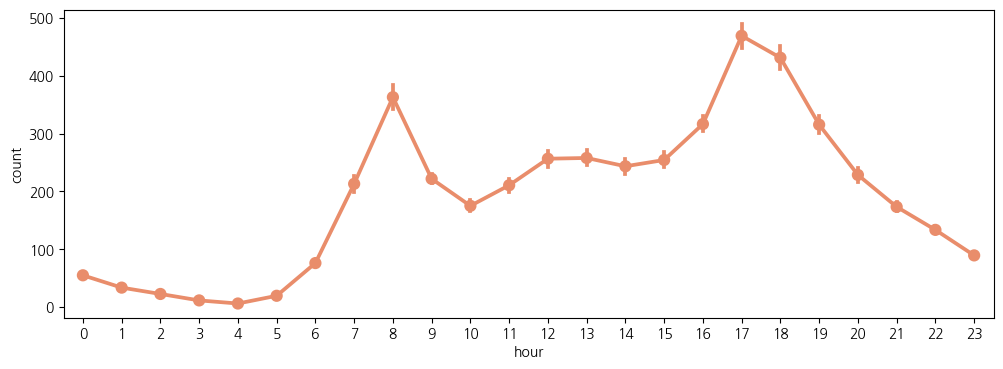

In [13]:
plt.figure(figsize = (12, 4))
sns.pointplot(x = 'hour', y = 'count', data = df)
plt.show()
#

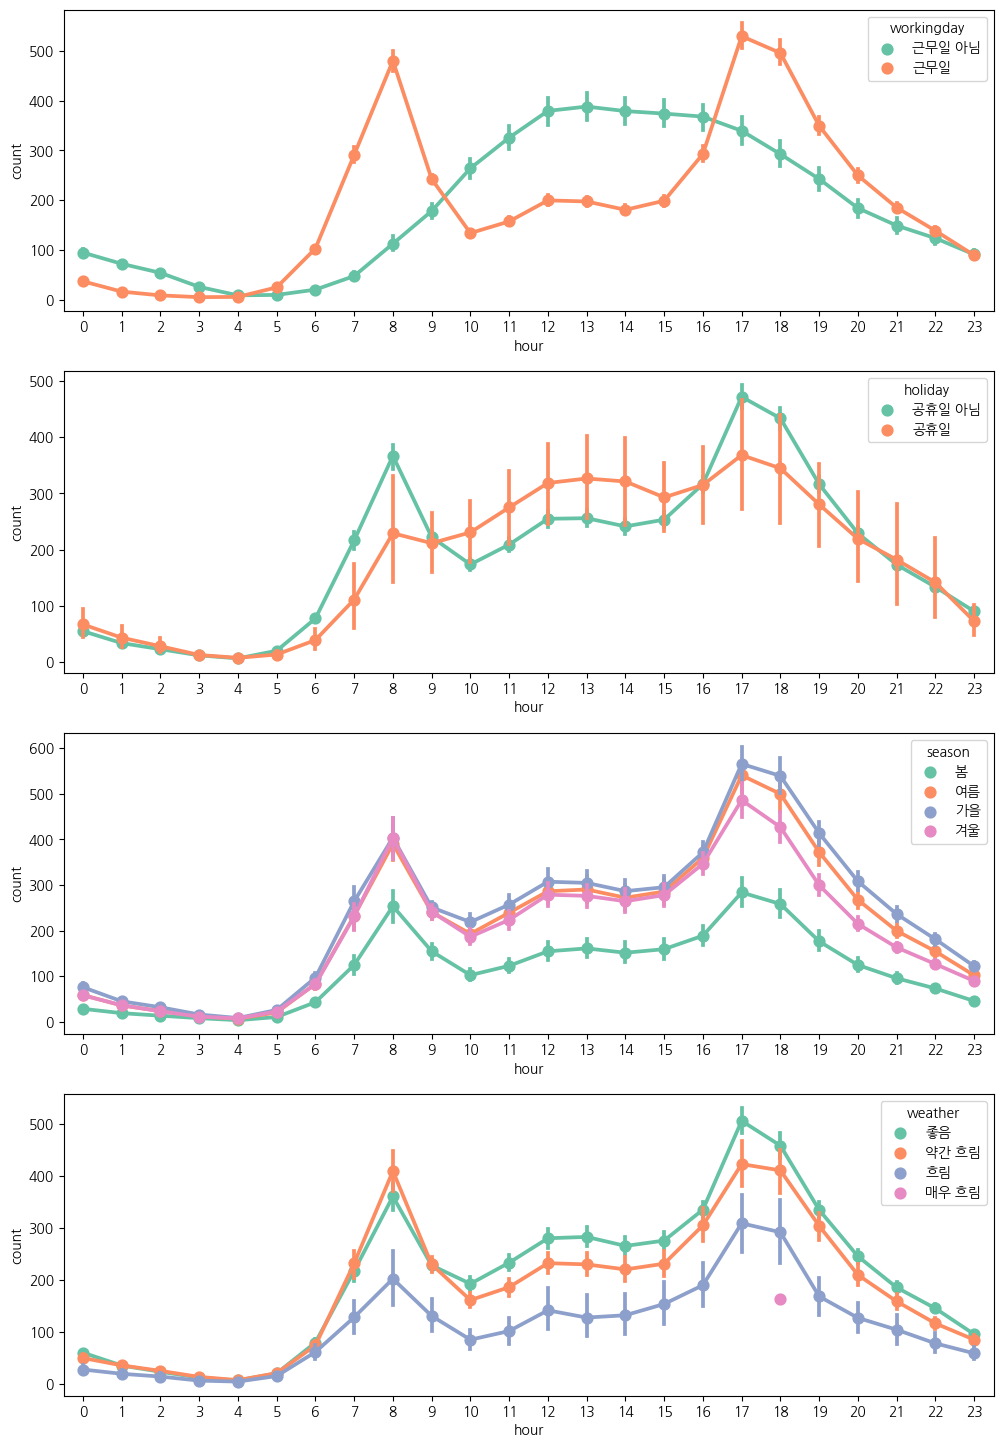

In [14]:
sns.set_palette("Set2") #범주로 구분하여 사용할때에는 연속적인 팔레트가 아닌 구분되는 팔레트로 사용

fig, axs = plt.subplots(nrows = 4)
fig.set_size_inches(12, 18)

sns.pointplot(x = 'hour', y = 'count', data = df, hue = 'workingday', ax = axs[0])
sns.pointplot(x = 'hour', y = 'count', data = df, hue = 'holiday', ax = axs[1])
sns.pointplot(x = 'hour', y = 'count', data = df, hue = 'season', ax = axs[2])
sns.pointplot(x = 'hour', y = 'count', data = df, hue = 'weather', ax = axs[3])
plt.show()

In [15]:
# 이상치 발견!
df[df.weather=='매우 흐림']

datetime season holiday workingday weather  temp   atemp  \
5631 2012-01-09 18:00:00      봄  공휴일 아님        근무일   매우 흐림   8.2  11.365   

      humidity  windspeed  casual  registered  count  year  month  day  hour  \
5631        86     6.0032       6         158    164  2012      1    9    18   

     dayofweek  
5631         월

<Axes: xlabel='hour', ylabel='count'>

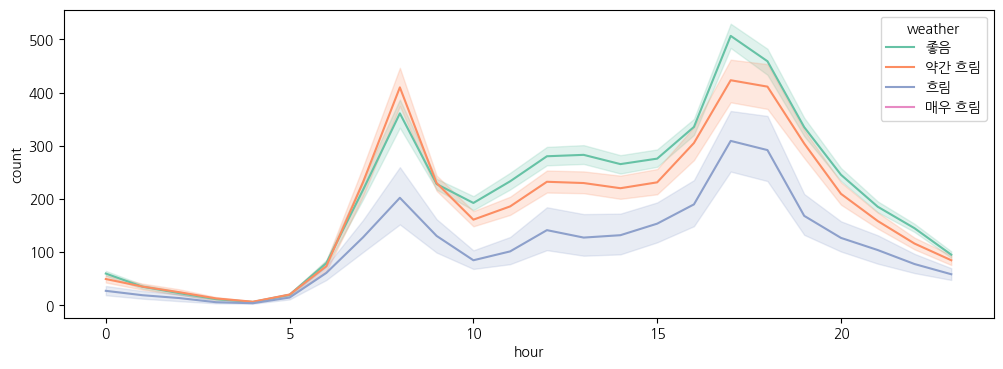

In [16]:
plt.figure(figsize = (12, 4))
sns.lineplot(x = 'hour', y = 'count', data = df, hue = 'weather')
# plt.savefig("image1.svg")

## 상관관계

In [17]:
df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

temp     atemp  humidity  windspeed     count
temp       1.000000  0.984948 -0.064949  -0.017852  0.394454
atemp      0.984948  1.000000 -0.043536  -0.057473  0.389784
humidity  -0.064949 -0.043536  1.000000  -0.318607 -0.317371
windspeed -0.017852 -0.057473 -0.318607   1.000000  0.101369
count      0.394454  0.389784 -0.317371   0.101369  1.000000

<Axes: >

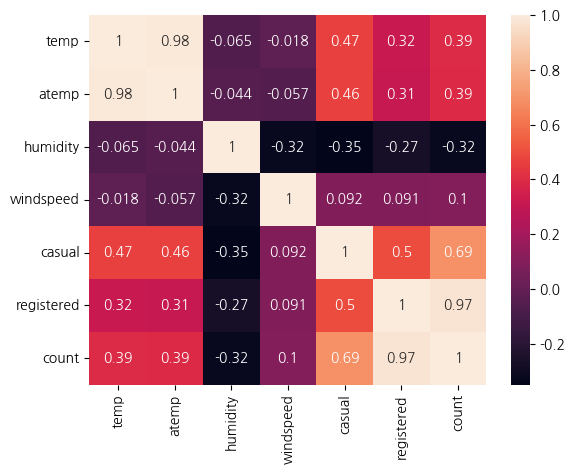

In [18]:
sns.heatmap(df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(), annot = True)

- 계절, month 등 순환적인 시계열의 경우 rose diagram 을 많이 사용합니다. 
- Nightingale's Rose Diagram
- 월별 카운트(평균)가 필요


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Nightingale-mortality.jpg/1920px-Nightingale-mortality.jpg" alt="drawing" width="500"/>

In [19]:
df_month = pd.pivot_table(df, values=['casual', 'registered'], index=['month'],aggfunc='mean')
df_day = pd.pivot_table(df, values=['casual', 'registered'], index=['dayofweek'],aggfunc='mean')
df_day = df_day.reindex(['월', '화', '수', '목', '금', '토', '일'])
df_day

casual  registered
dayofweek                       
월          29.843972  160.546744
화          22.979207  166.744639
수          22.521599  165.889749
목          24.007083  173.289118
금          31.001962  166.842381
토          63.625000  133.040404
일          57.051298  123.788474

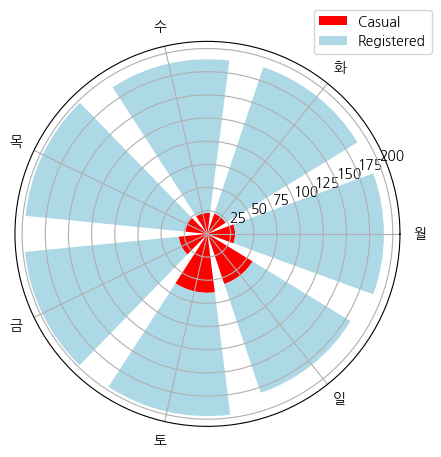

In [20]:
# 로즈 다이어그램을 그리기 위해 각 월별 데이터에 대한 각도를 계산
n_index = len(df_day)
angles = [n / float(n_index) * 2 * np.pi for n in range(n_index)]
angles += angles[:1]  # 닫힌 원형 차트를 만들기 위해 첫 번째 각도를 마지막에 추가

# 서브플롯 설정
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True)) # 극좌표로 그리기(polar)

# 첫 번째 부채꼴로 casual을 표시
ax.bar(angles[:-1], df_day['casual'], color='red', width=0.7, label='Casual')

# 두 번째 부채꼴로 registered를 표시 (casual 위에 쌓음)
ax.bar(angles[:-1], df_day['registered'], bottom = df_day['casual'], color='lightblue', width=0.7, label='Registered')

# 레이블 추가
ax.set_xticks(angles[:-1])
ax.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'])

# 범례 추가
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()



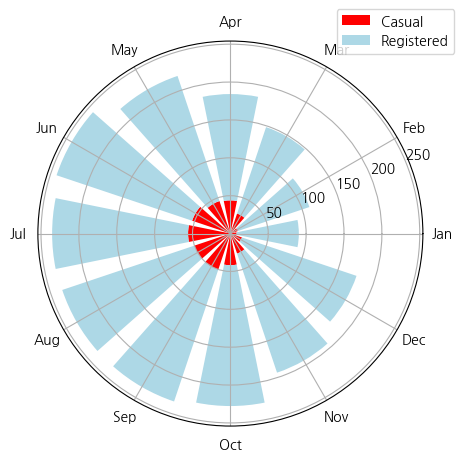

In [21]:
# 로즈 다이어그램을 그리기 위해 각 월별 데이터에 대한 각도를 계산
n_index = len(df_month)
angles = [n / float(n_index) * 2 * np.pi for n in range(n_index)]
angles += angles[:1]  # 닫힌 원형 차트를 만들기 위해 첫 번째 각도를 마지막에 추가

# 서브플롯 설정
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# 첫 번째 부채꼴로 casual을 표시
ax.bar(angles[:-1], df_month['casual'], color='red', width=0.4, label='Casual')

# 두 번째 부채꼴로 registered를 표시 (casual 위에 쌓음)
ax.bar(angles[:-1], df_month['registered'], bottom = df_month['casual'], color='lightblue', width=0.4, label='Registered')

# 레이블 추가
ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# 범례 추가
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()



# 3. 분포 재표현

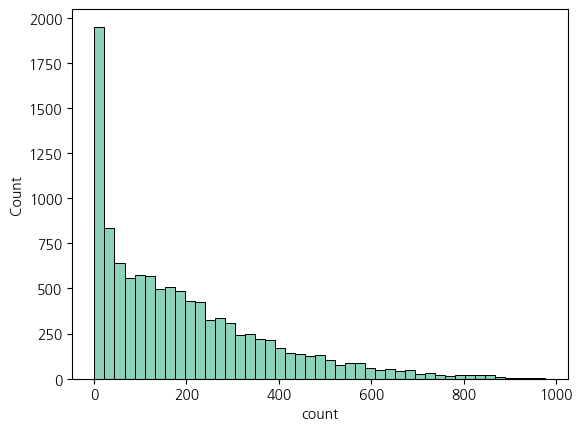

In [22]:
# casual, registered, count 가 치우친 분포이므로 재표현
sns.histplot(df['count'])
plt.show()

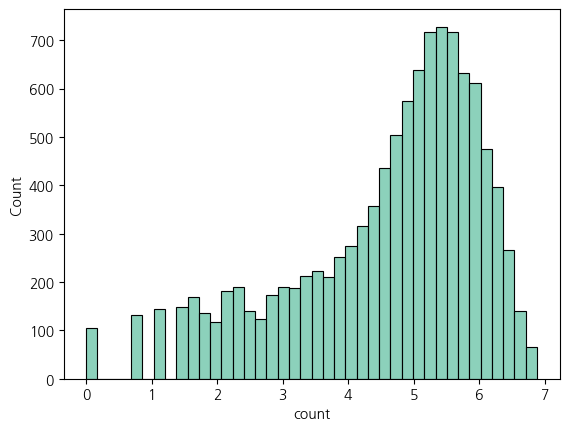

In [23]:
sns.histplot(np.log(df['count']))
plt.show()

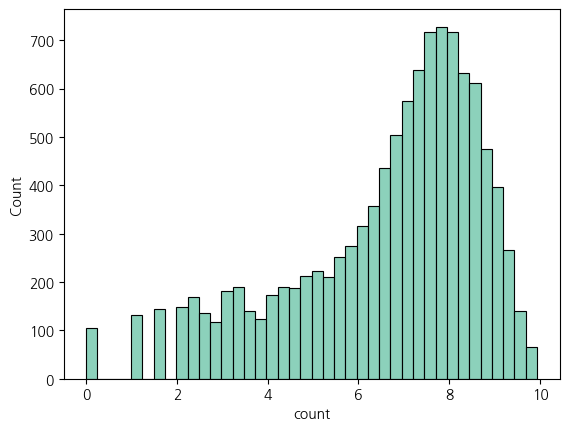

In [24]:
sns.histplot(np.log2(df['count']))
plt.show()

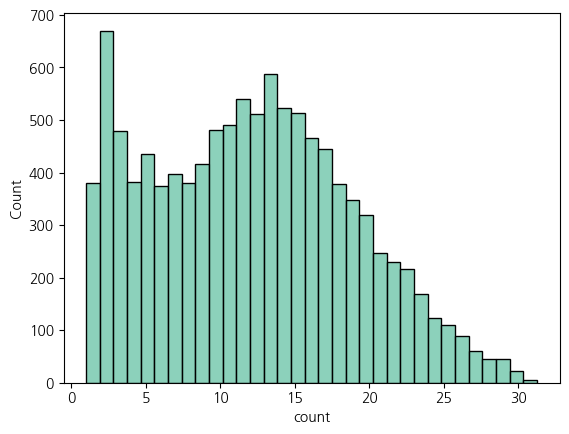

In [25]:
sns.histplot(np.sqrt(df['count']))
plt.show()

# 4. 잔차분석

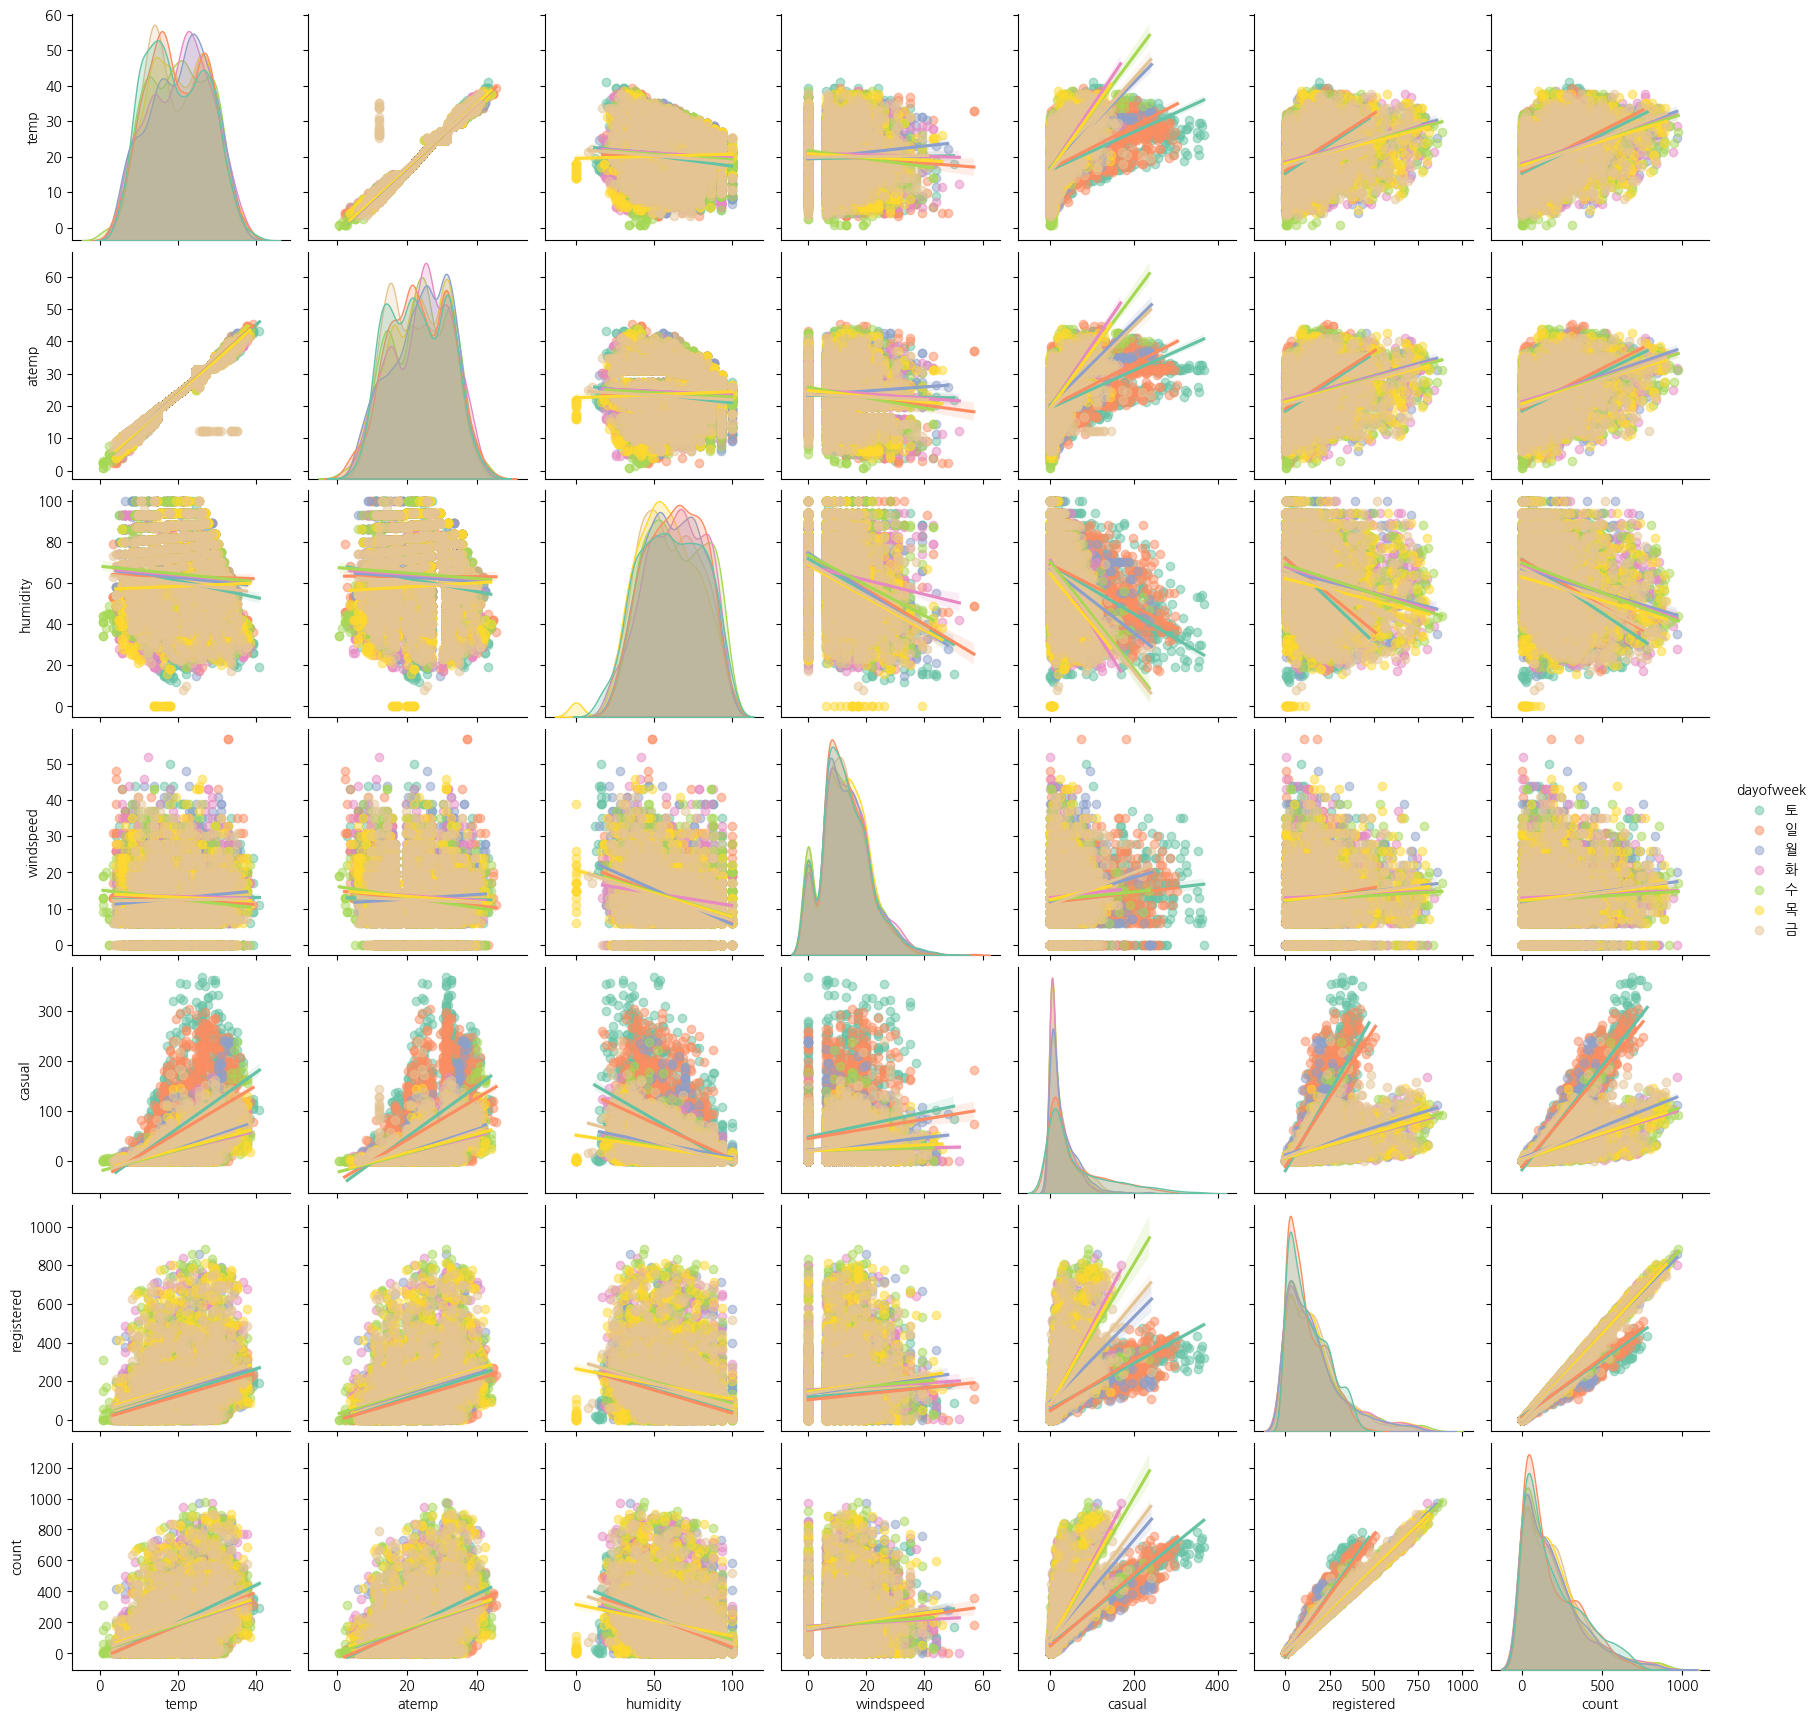

In [26]:
df2 = df.copy()
df2 = df2.drop(['year', 'month','day','hour'], axis = 1)
sns.pairplot(df2, kind = 'reg',  hue = 'dayofweek', plot_kws={"scatter_kws": {"alpha":0.5}}) 

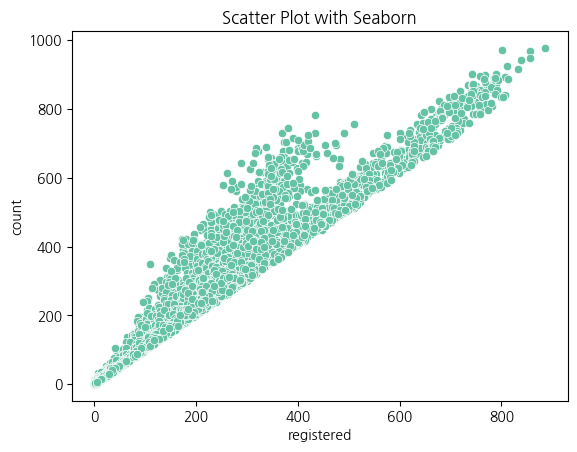

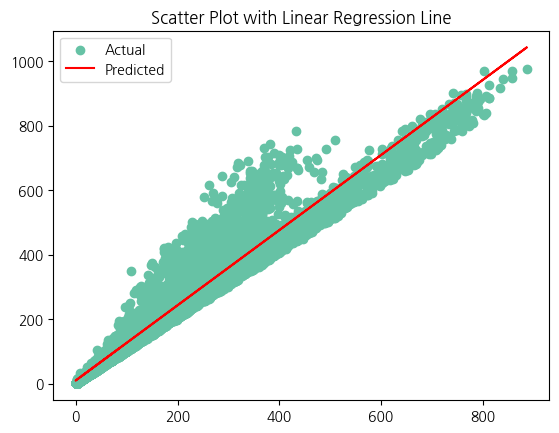

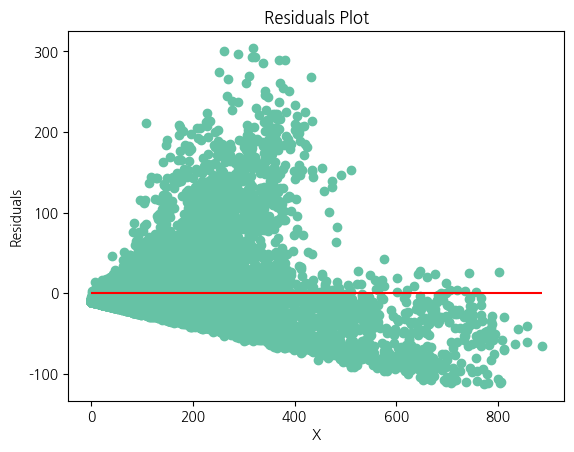

(1878.7103589542758, 0.9427402241756933)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 임의의 데이터 생성
# np.random.seed(0)
# x = np.random.rand(100)
# y = 2 * x + np.random.normal(0, 0.1, 100)
# data = pd.DataFrame({'X': x, 'Y': y})

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(x='registered', y='count', data=df)
plt.title("Scatter Plot with Seaborn")
plt.show()

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(df[['registered']], df['count'])

# 예측 값과 실제 값 비교를 위한 산점도
predicted = model.predict(df[['registered']])
plt.scatter(df['registered'], df['count'], label='Actual')
plt.plot(df['registered'], predicted, color='red', label='Predicted')
plt.title("Scatter Plot with Linear Regression Line")
plt.legend()
plt.show()

# 잔차 분석
residuals = df['count'] - predicted

# 잔차 산점도
plt.scatter(df['registered'], residuals)
plt.hlines(y=0, xmin=df['registered'].min(), xmax=df['registered'].max(), color='red')
plt.title("Residuals Plot")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.show()

# 회귀 분석 결과 요약
mse = mean_squared_error(df['count'], predicted)
r2 = r2_score(df['count'], predicted)

mse, r2



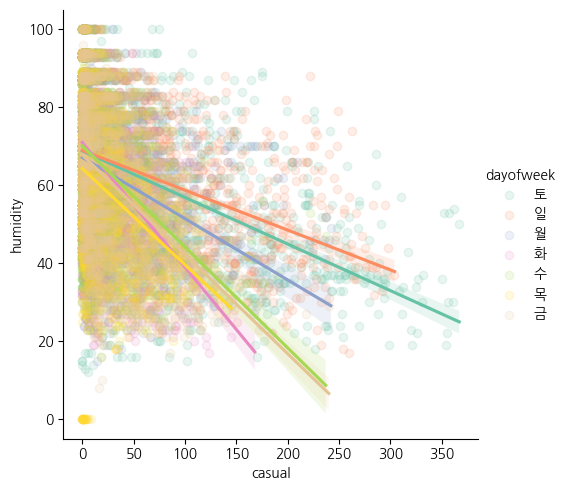

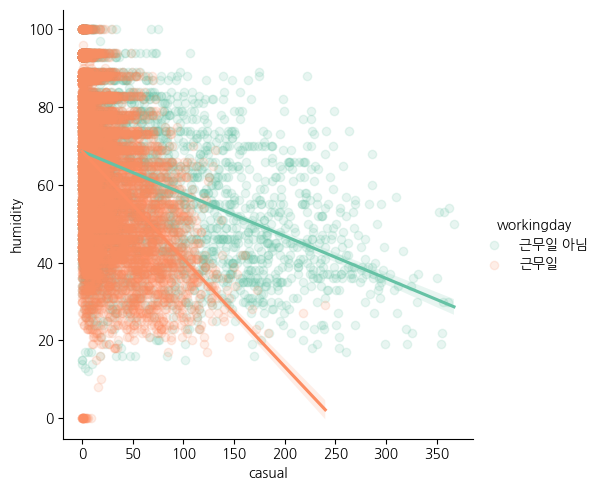

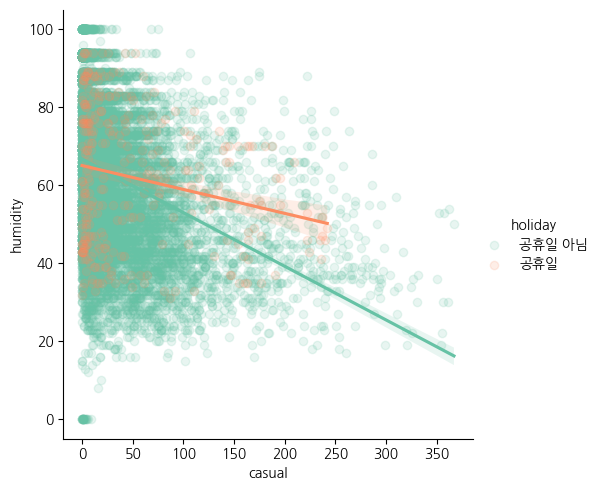

In [28]:
for x in ['dayofweek', 'workingday', 'holiday']:
    sns.lmplot(data = df, x = 'casual', y = 'humidity', hue = x, scatter_kws = {'alpha':0.15})
    plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def plot_residuals(df, x, y):

    # DataFrame의 복사본 생성
    df_copy = df.copy()
    df_copy = df_copy.dropna()

    # 선형 회귀 모델 생성 및 학습
    model = LinearRegression()
    model.fit(df_copy[[x]], df_copy[y])

    # 예측 및 잔차 계산
    df_copy['Predicted'] = model.predict(df_copy[[x]])
    df_copy['Residuals'] = df_copy[y] - df_copy['Predicted']

    fig, axs = plt.subplots(ncols=2, figsize=(8, 3))
    sns.regplot(x=x, y=y, data=df_copy, ax = axs[0], line_kws = {'color' : 'red'})
    sns.regplot(data = df_copy, x='Predicted', y='Residuals', lowess=True,  line_kws={'color': 'red'}, ax = axs[1])
    axs[1].hlines(y=0, xmin=df_copy['Predicted'].min(), xmax=df_copy['Predicted'].max(), color='red')
    axs[0].set_title(f'회귀선')
    axs[1].set_title('잔차그래프')    

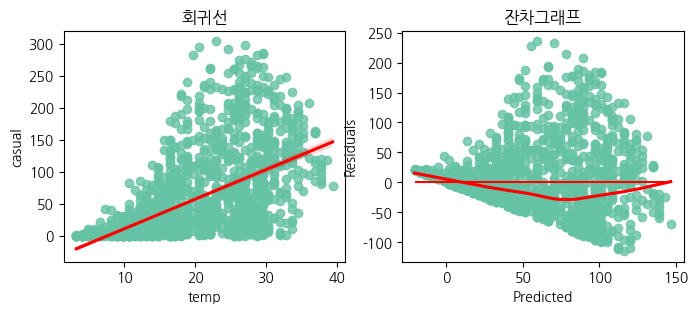

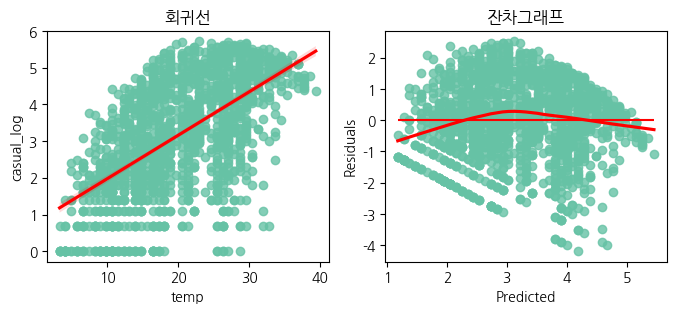

In [30]:
df2 = df.copy()
df2['casual_log'] = np.log(df2['casual']+1)
plot_residuals(df2[df2.dayofweek=='일'], 'temp', 'casual')
plot_residuals(df2[df2.dayofweek=='일'], 'temp', 'casual_log')

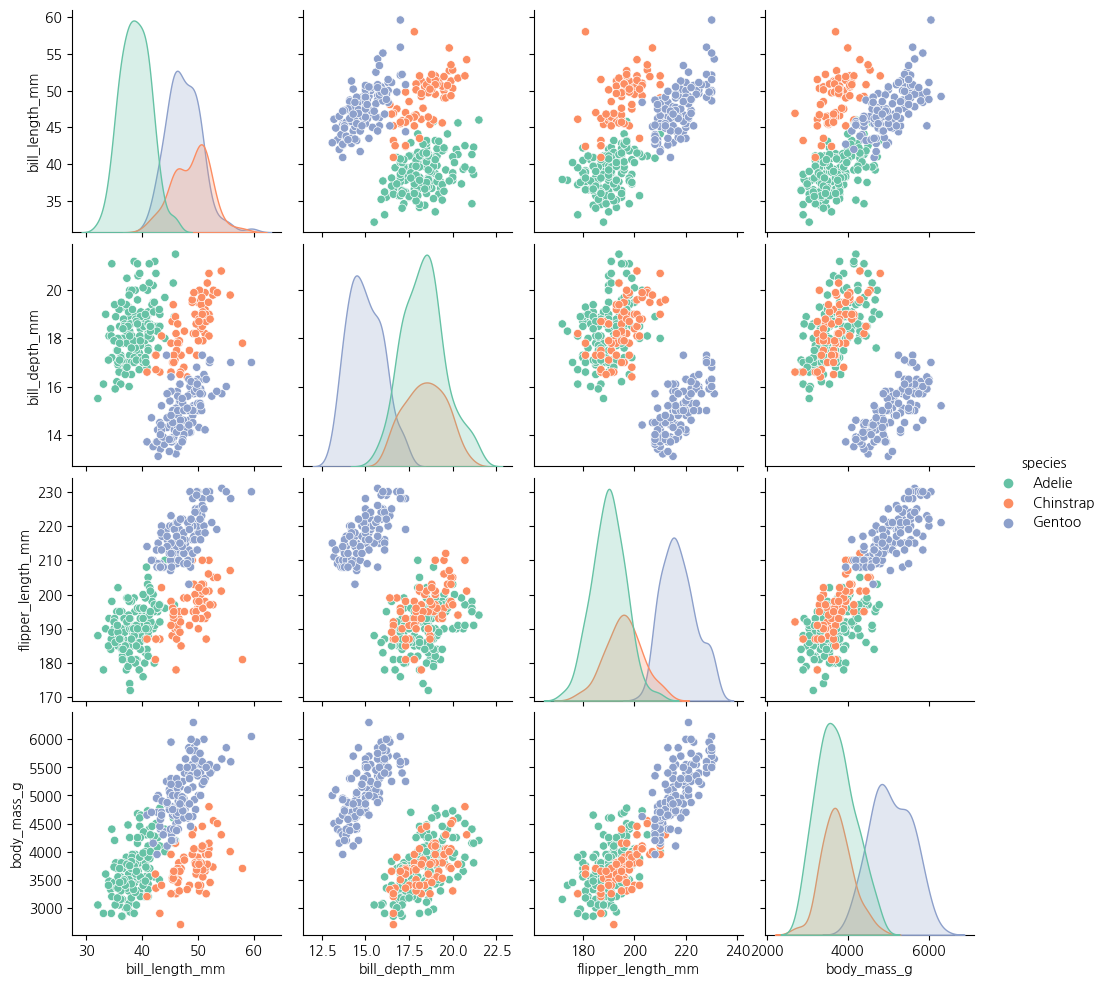

In [31]:
# 펭귄데이터로 잔차플롯 예시 보기
pg = sns.load_dataset("penguins")
sns.pairplot(data = pg, hue = 'species')

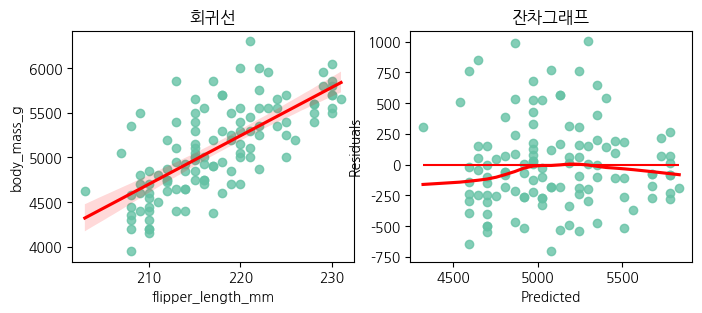

In [32]:
# 하나의 종에 대해서만 잔차플롯 그리기
plot_residuals(pg[pg.species=='Gentoo'], 'flipper_length_mm', 'body_mass_g')

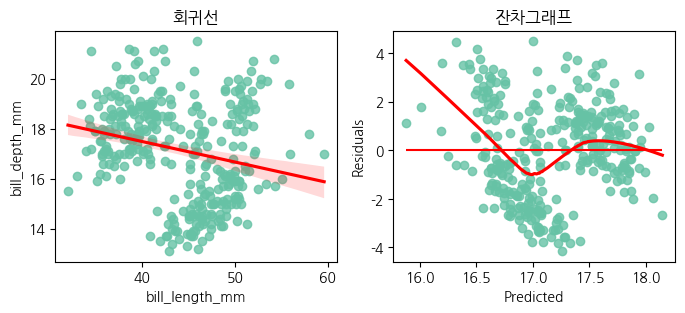

In [33]:
# 전체 종에 대한 잔차플롯 
plot_residuals(pg, 'bill_length_mm', 'bill_depth_mm')